**This dataset contains a variety of laptop specifications and the price of each device in Euros, the goal is to create a machine learning model to train the model to predict laptop prices.**

**Details of the columns:**

* Company - Laptop manufacturer
* Product - Brand and Model.
* TypeName - Type (Notebook, Ultrabook, Gaming, etc.)
* Inches - Screen Size.
* ScreenResolution - Screen Resolution
* CPU_Company - Central Processing Unit (CPU) manufacturer.
* CPU_Type - Central Processing Unit (CPU) type.
* CPU_Frequency - Central Processing Unit (CPU) Frequency (GHz).
* RAM (GB) - Laptop RAM.
* Memory - Hard Disk / SSD Memory.
* GPU_Company - Graphics Processing Units (GPU) manufacturer.
* GPU_Type - Graphics Processing Units (GPU) type.
* OpSys - Operating System.
* Weight (kg) - Laptop Weight (kg).
* Price (Euro) - Laptop price (Euro).

**Importing Libraries**

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Reading the dataset**

In [3]:
df = pd.read_csv('C:/Users/user/MACHINE_LEARNING/laptop_price_prediction/notebook/data/laptop_price.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [4]:
# Determining the shape of the dataset

df.shape

(1275, 15)

In [5]:
# Getting some info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   CPU_Company       1275 non-null   object 
 6   CPU_Type          1275 non-null   object 
 7   CPU_Frequency     1275 non-null   float64
 8   RAM               1275 non-null   int64  
 9   Memory            1275 non-null   object 
 10  GPU_Company       1275 non-null   object 
 11  GPU_Type          1275 non-null   object 
 12  OpSys             1275 non-null   object 
 13  Weight            1275 non-null   float64
 14  Price             1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 149.5+ KB


**Insight: The dataset has 10 categorical features and 5 numerical features**

In [6]:
# Description on the numerical features

df.describe()

,Inches,CPU_Frequency,RAM,Weight,Price
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [7]:
# Determing if the data has null values

df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
CPU_Company         0
CPU_Type            0
CPU_Frequency       0
RAM                 0
Memory              0
GPU_Company         0
GPU_Type            0
OpSys               0
Weight              0
Price               0
dtype: int64

*Insight: No column has null values*

In [8]:
# Determing duplicate values

df.duplicated().sum()

0

*insight: Zero rows are duplicated*

*Descriptive Statistics*

In [9]:
# Separating categorical features and numerical features


cat_columns = list(df.columns[df.dtypes=='object'])
num_columns = list(df.columns[df.dtypes!='object'])

print(f"The categorical features are {len(cat_columns)}: {cat_columns}" )
print(f"The numerical features are {len(num_columns)}:{num_columns}")

The categorical features are 10: ['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys']
The numerical features are 5:['Inches', 'CPU_Frequency', 'RAM', 'Weight', 'Price']


In [10]:
# Categorical column description

df[cat_columns].describe().T

,count,unique,top,freq
Company,1275,19,Dell,291
Product,1275,618,XPS 13,30
TypeName,1275,6,Notebook,707
ScreenResolution,1275,40,Full HD 1920x1080,505
CPU_Company,1275,3,Intel,1214
CPU_Type,1275,93,Core i5 7200U,193
Memory,1275,39,256GB SSD,412
GPU_Company,1275,4,Intel,704
GPU_Type,1275,106,HD Graphics 620,280
OpSys,1275,9,Windows 10,1048


In [40]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [18]:
df['Product'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [29]:
count = {}

for i in df['Product']:
    count[i] = count.get(i, 0) + 1

print(count)

{'MacBook Pro': 10, 'Macbook Air': 2, '250 G6': 21, 'Aspire 3': 12, 'ZenBook UX430UN': 1, 'Swift 3': 5, 'Inspiron 3567': 25, 'MacBook 12"': 6, 'IdeaPad 320-15IKB': 5, 'XPS 13': 30, 'Vivobook E200HA': 1, 'Legion Y520-15IKBN': 19, '255 G6': 4, 'Inspiron 5379': 5, '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)': 1, 'MacBook Air': 3, 'Inspiron 5570': 18, 'Latitude 5590': 3, 'ProBook 470': 8, 'LapBook 15.6"': 1, 'E402WA-GA010T (E2-6110/2GB/32GB/W10)': 1, '17-ak001nv (A6-9220/4GB/500GB/Radeon': 1, 'IdeaPad 120S-14IAP': 2, 'Inspiron 5770': 8, 'ProBook 450': 18, 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)': 1, 'Inspiron 7577': 6, 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce': 1, 'Aspire A515-51G': 4, 'Inspiron 7773': 2, 'IdeaPad 320-15ISK': 8, 'Rog Strix': 6, 'X751NV-TY001T (N4200/4GB/1TB/GeForce': 1, 'Yoga Book': 4, 'ProBook 430': 7, 'Inspiron 3576': 6, '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)': 1, 'VivoBook Max': 4, 'GS73VR 7RG': 1, 'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)': 1, 'Vostro 5471': 1, 'I

In [ ]:
# Identifying the number of unique values in each column of the whole dataset

df.nunique()

Company                 19
Product                618
TypeName                 6
Inches                  18
ScreenResolution        40
CPU_Company              3
CPU_Type                93
CPU_Frequency (GHz)     25
RAM (GB)                 9
Memory                  39
GPU_Company              4
GPU_Type               106
OpSys                    9
Weight (kg)            171
Price (Euro)           791
dtype: int64

**Univariate Analysis on numerical colunms**

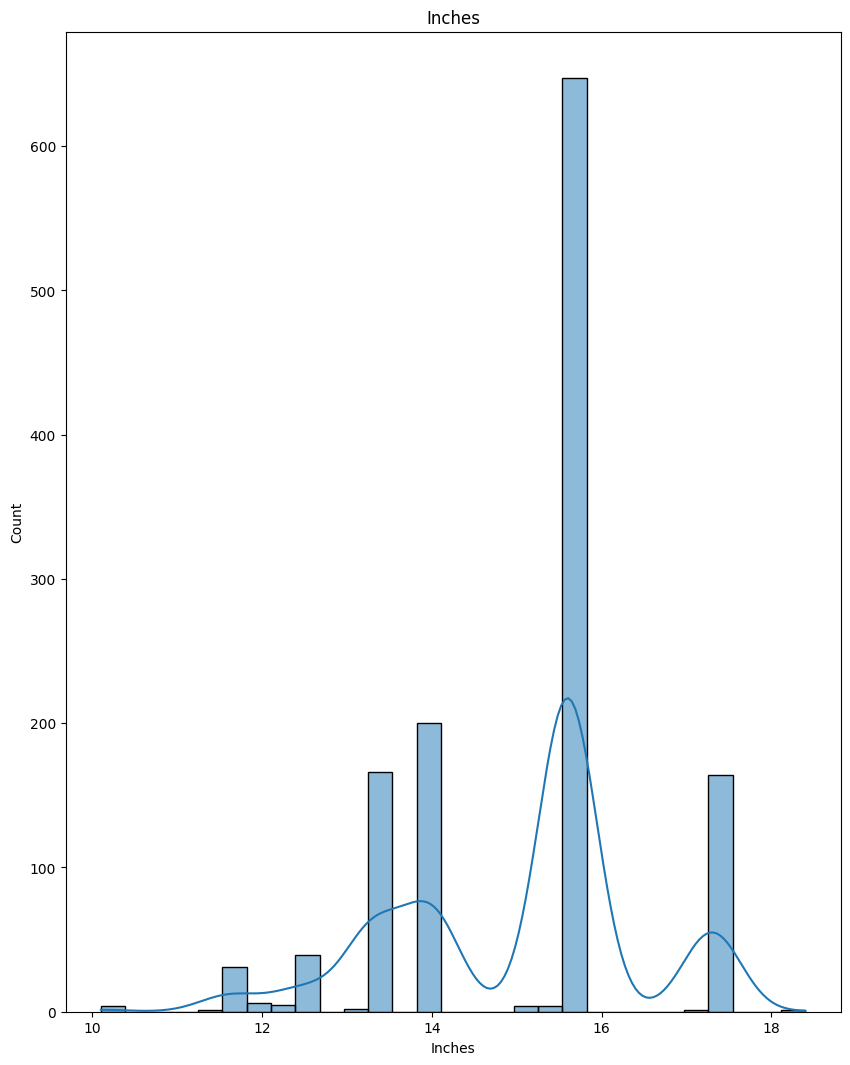

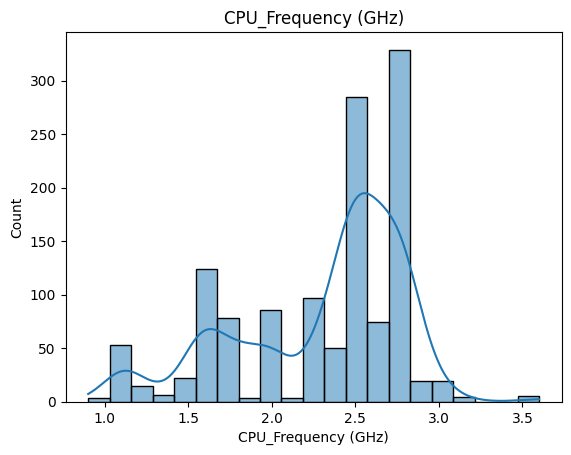

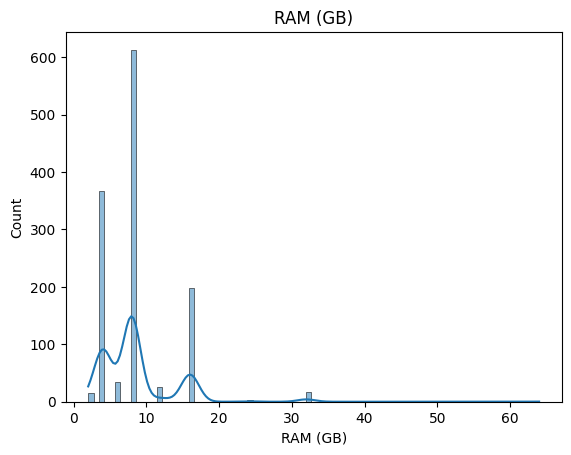

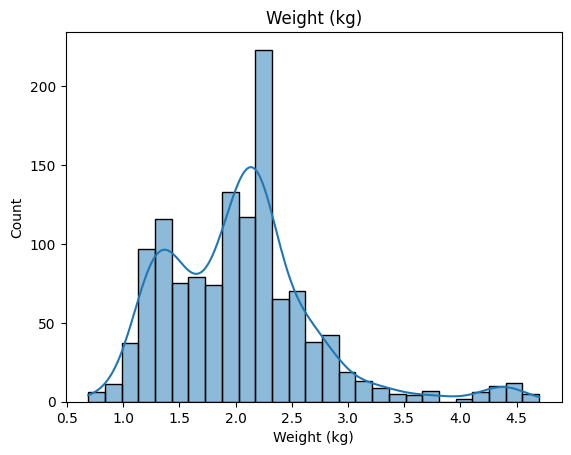

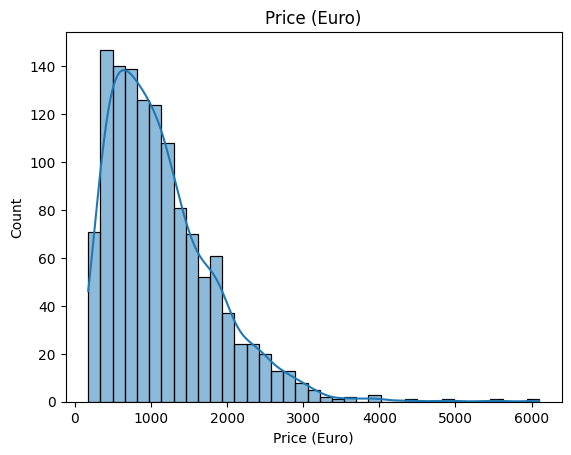

In [ ]:
# Showing the frequency of distribution of the numerical variable using histogram

plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in num_columns:
    sb.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

**Univariate Analysis of categorical features using bar graph**

In [ ]:
# Since some categorical features have very many unique values that cannot be represented in a graph, we only visualize a few

df_cat_col_viz = (df[cat_columns].nunique() <= 20).loc[lambda x : x].index.tolist()
df_cat_col_viz

['Company', 'TypeName', 'CPU_Company', 'GPU_Company', 'OpSys']

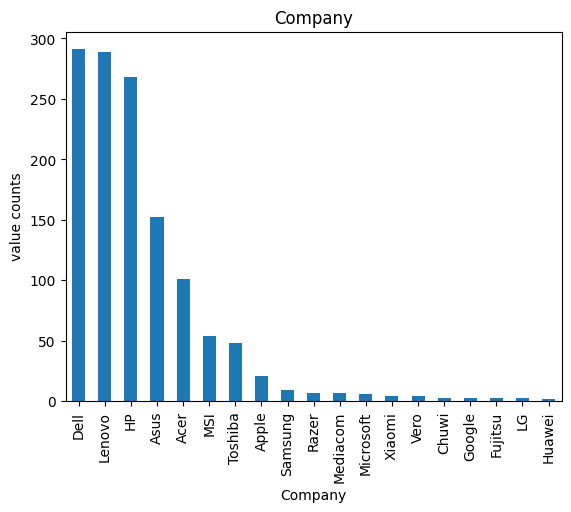

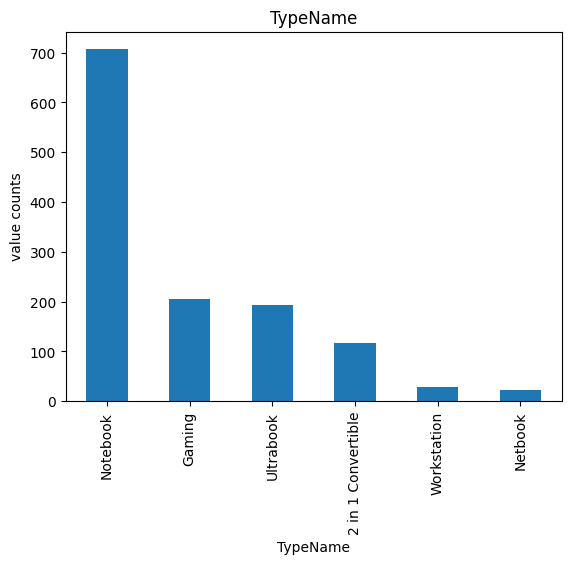

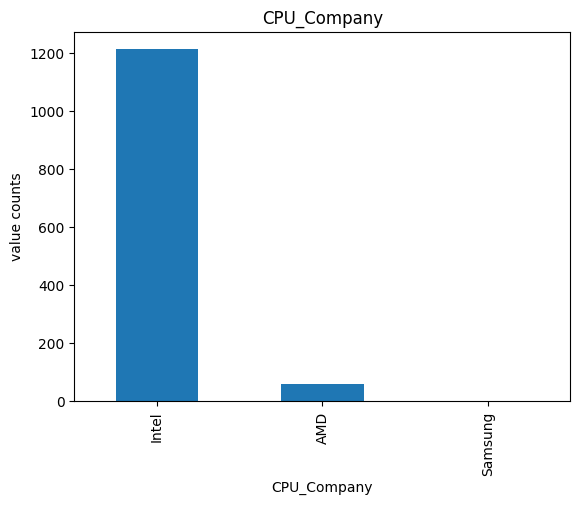

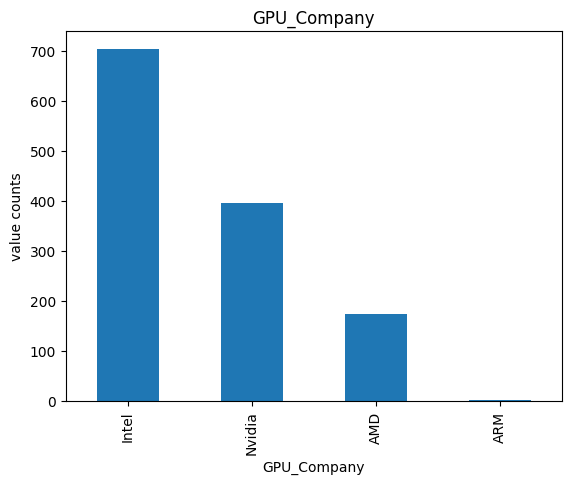

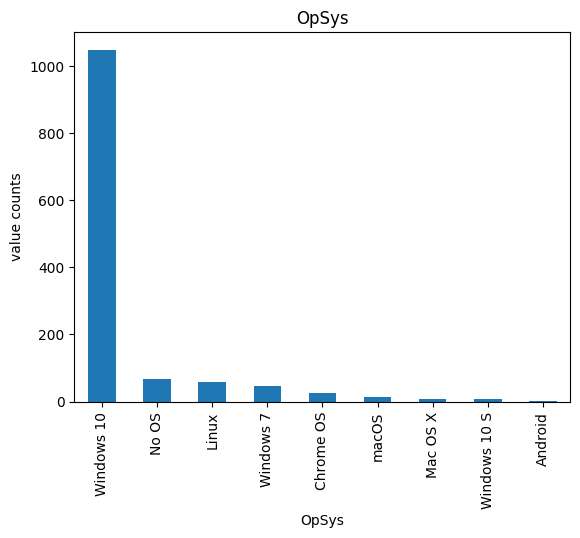

In [ ]:
# Bar chats of the chosen categorical columns

for i in df_cat_col_viz:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

**Correlation Heatmap**

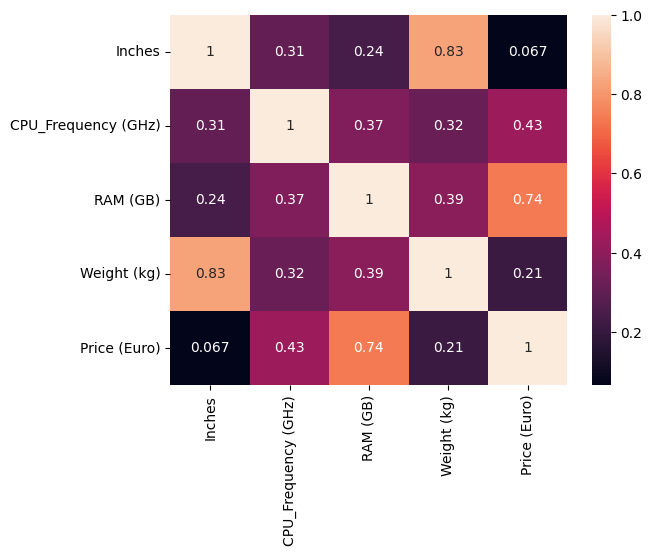

In [ ]:
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

**Pair Plot**

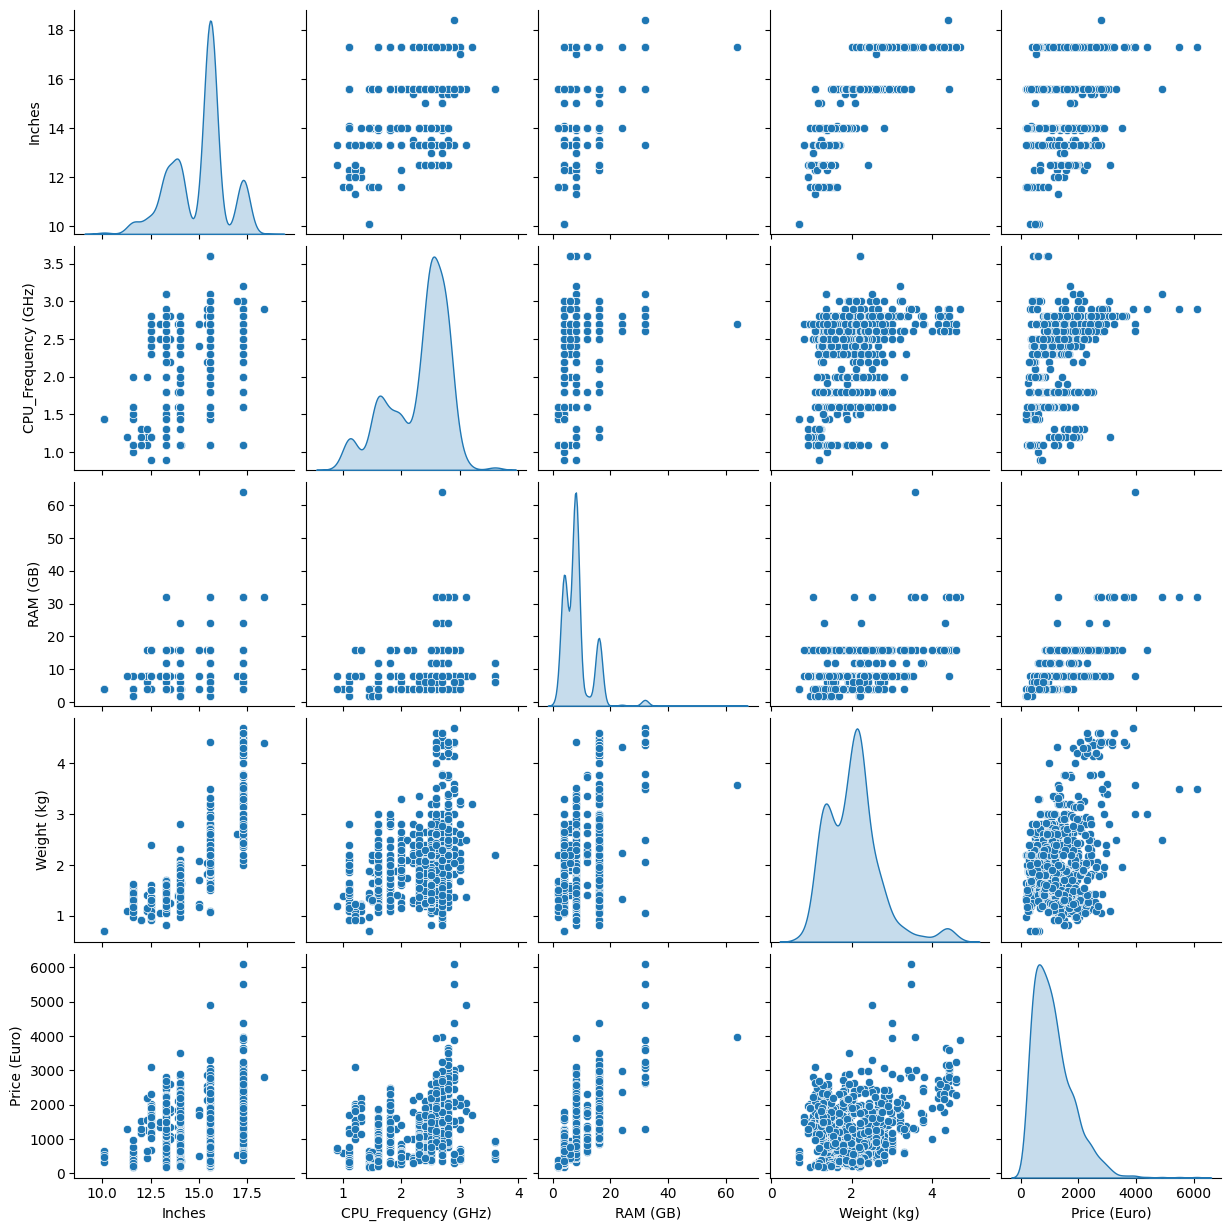

In [ ]:
sb.pairplot(df,diag_kind='kde')
plt.show()

**Categorical Features Vs Numerical features boxplot**

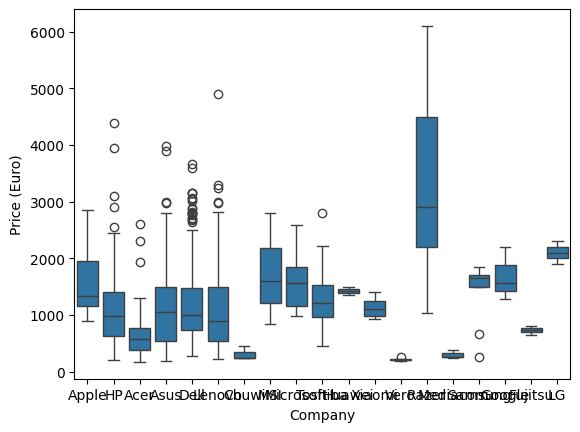

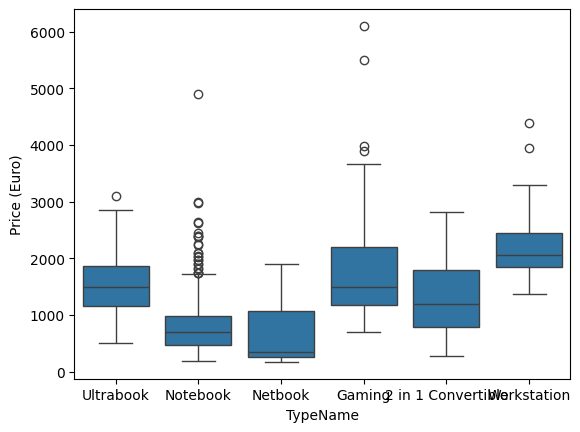

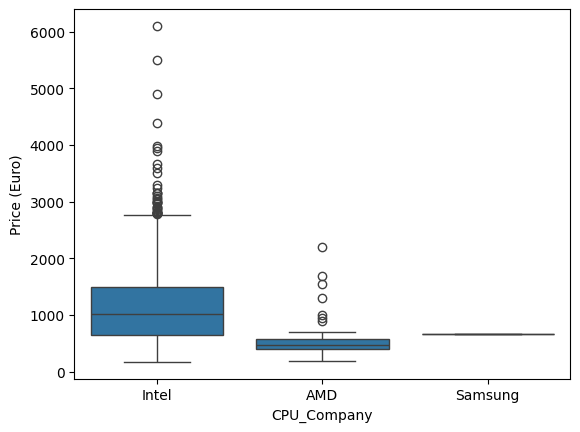

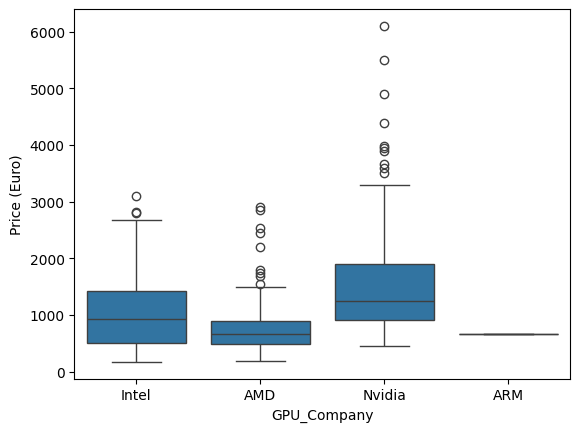

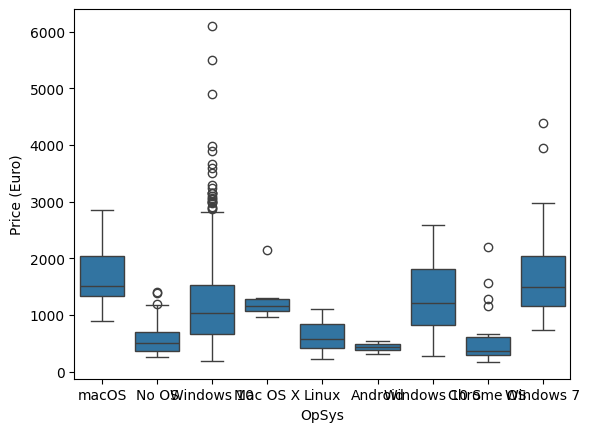

In [ ]:
for i in df_cat_col_viz:
    sb.boxplot(data=df, x=i , y='Price (Euro)')
    plt.show()

In [ ]:
df[cat_columns].nunique()

Company              19
Product             618
TypeName              6
ScreenResolution     40
CPU_Company           3
CPU_Type             93
Memory               39
GPU_Company           4
GPU_Type            106
OpSys                 9
dtype: int64